In [21]:
import pandas as pd
import sys
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [22]:
df=pd.read_excel("ML470_S1_HR_Data_Practice.xlsx")

In [23]:
df_encoded = pd.get_dummies(df, columns=["Department", "salary"])

X = df_encoded.drop("left", axis=1)
y = df_encoded["left"]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [25]:
y_pred = model.predict(X_test)


In [26]:
ML_Modules.evaluate_classifier(y_test, y_pred)


Confusion Matrix
[[2073 1383]
 [ 184  860]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.60      0.73      3456
           1       0.38      0.82      0.52      1044

    accuracy                           0.65      4500
   macro avg       0.65      0.71      0.62      4500
weighted avg       0.79      0.65      0.68      4500

accuracy: 0.652
recall: 0.652
f1-score: 0.679
precision: 0.794


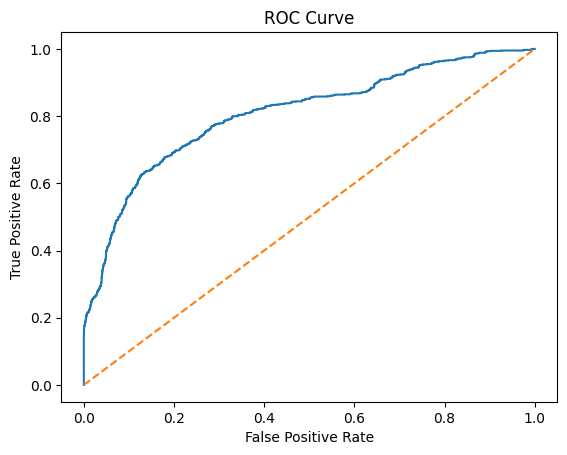

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()